In this example, we plot the phase CPSD before integrating it over the (perpendicular) spatial frequencies.

The aim is to show that the function oscillates very quickly around 0 in the range of high temporal and spatial frequencies (due to the exp in the formula). Therefore, it is important to choose the spatial frequency range with the proper sampling in order not to over(under)estimate the phase CPSD.

In [13]:
import numpy as np
from apposto.types.guide_source import GuideSource
from apposto.types.aperture import CircularOpticalAperture
from apposto.atmo.von_karman_covariance_calculator import VonKarmanSpatioTemporalCovariance
from apposto.atmo.cn2_profile import Cn2Profile

source1 = GuideSource((0, 0), np.inf)
source2 = GuideSource((50, 30), 100e3)
aperture1 = CircularOpticalAperture(5, [0, 0, 0])
aperture2 = CircularOpticalAperture(5, [0, 0, 0])
cn2 = Cn2Profile.from_fractional_j(r0AtZenith=0.16, layersFractionalJ=[1.0], layersL0=[25], layersAltitude=[10e3],
                                   layersWindSpeed=[10], layersWindDirection=[-20])
temp_freqs = np.linspace(0.05, 250, 5000)
spat_freqs = np.logspace(-3, 3, 1000)

vk = VonKarmanSpatioTemporalCovariance(source1=source1, source2=source2, aperture1=aperture1, aperture2=aperture2,
                                        cn2_profile=cn2, spat_freqs=spat_freqs)
    
intFunc, _ = vk.integrandOfPhaseCPSD(nLayer=0, temp_freq=temp_freqs[500])

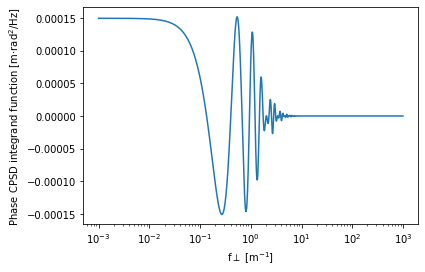

In [14]:
import matplotlib.pyplot as plt

plt.semilogx(spat_freqs, np.real(intFunc))
plt.xlabel('f${\perp}$ [m$^{-1}$]')
plt.ylabel('Phase CPSD integrand function [m$\cdot$rad$^{2}$/Hz]')
plt.show()